In [1]:
import numpy as np
import pandas as pd
from astropy.table import Table

from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
plt.style.use('dark_background')

In [2]:
def write_fit_file(name, x, data):
    my_types = {'COADD_OBJECT_ID': int, 'TILENAME': str, 'PROB': float, 'HPIX_16384': int, 'HPIX_4096': int,
       'DNF_ZMEAN_SOF': float, 'RA': float, 'DEC': float, 'FLUX_RADIUS_G': float, 'FLUX_RADIUS_R': float,
       'FLUX_RADIUS_I': float, 'FLUX_RADIUS_Z': float, 'KRON_RADIUS': float, 'GAP_FLUX_G': float,
       'MOF_BDF_FLUX_G': float, 'MOF_PSF_FLUX_G': float, 'SOF_BDF_FLUX_G': float, 'SOF_PSF_FLUX_G': float,
       'MAG_AUTO_G': float, 'MAG_APER_4_G': float, 'MAG_APER_8_G': float, 'SOF_BDF_G_1': float,
       'SOF_BDF_G_2': float, 'IMAFLAGS_ISO_G': int, 'IMAFLAGS_ISO_R': int, 'IMAFLAGS_ISO_I': int,
       'IMAFLAGS_ISO_Z': int, 'EXT_COADD': int, 'NEW_ID': int, 'CLASS': str, 'REPORTED': bool,
       'SUBJECT_ID': int, 'SCORE': float, 'PROB_SING': float, 'PROB_DOUB': float}
    
    data = data.astype(my_types)
    
    primary = fits.PrimaryHDU()
    image = fits.ImageHDU(x, name="IMAGE")
    table_data = Table.from_pandas(data)
    table = fits.BinTableHDU(data = table_data)
    hdu_list = fits.HDUList([primary, image, table])
    hdu_list.writeto(file_path + name + '.fits', overwrite=True)   
    hdu_list.close()

In [3]:
filepath = '/Users/jimenagonzalez/research/DSPL/SpaceWarps_Inspection/Results/fits_files/'

hdu_list = fits.open(filepath + 'all_subjects.fits')
images = hdu_list[1].data
data = pd.DataFrame(hdu_list[2].data)
hdu_list.close()

print(len(data[data['SCORE'] > 0.00001]))

2502


20062


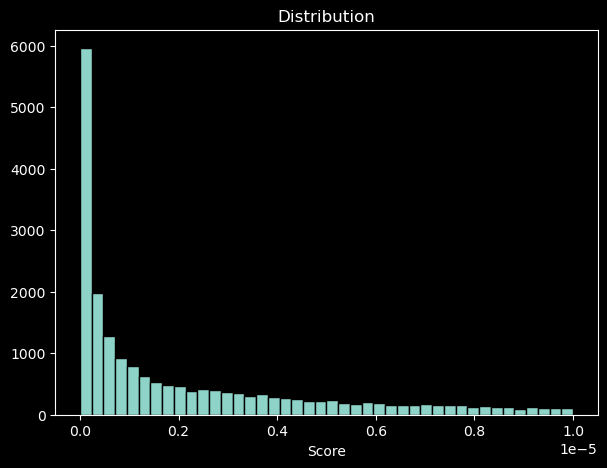

In [4]:
data_tmp = data[data['SCORE'] < 0.00001]
print(len(data_tmp))

plt.figure(figsize=(7,5))
plt.title('Distribution')
plt.xlabel('Score')

plt.hist(data_tmp['SCORE'], bins = 'auto', edgecolor = 'black')
plt.show()

In [5]:
file_path = '/Users/jimenagonzalez/research/DSPL/SpaceWarps_Inspection/Results/fits_files/'
data_tmp = data_tmp.sample(500)

write_fit_file('random', images[data_tmp.index], data_tmp)